In [1]:
%load_ext autoreload
%autoreload 2

# Tutorial: Potentials

start by getting the parameters we need:

In [2]:
#third party

import matplotlib.pyplot as plt
plt.style.use('/Users/juan/phd/matplotlib/jdefault.mplstyle')
import jax
import jax.numpy as jnp 
from jax._src.config import config
config.update("jax_enable_x64", True)

from dynamicAll import models

In [3]:
# model parameters
# NFW
rhos = 6.4e7 # scale density in Msun/kpc^3
rs   = 3.0   # scale radius in kpc

In [4]:
NFW = models.NFW(rhos,rs)

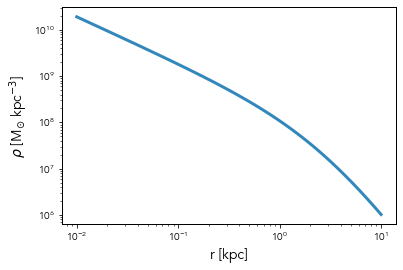

In [5]:
fig,ax = plt.subplots()
r = jnp.logspace(-2,1,100)
ax.plot(r,NFW.density(r))

ax.set(
    xscale='log',
    yscale='log',
    xlabel='r [kpc]',
    ylabel=r'$\rho$ [M$_{\odot}$ kpc$^{-3}$]',
);

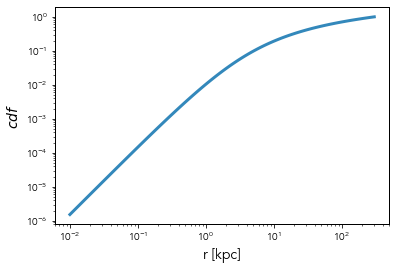

In [6]:
fig,ax = plt.subplots()
r = jnp.logspace(-2,jnp.log10(NFW.r200()),100)
ax.plot(r,NFW.cdf(r))
# ax.plot(r,NFW.mass(r))

ax.set(
    xscale='log',
    yscale='log',
    xlabel='r [kpc]',
    ylabel=r'$cdf$ ',
);

In [7]:
r_sampled = jax.vmap(NFW.random)

In [8]:
y = jax.random.uniform(jax.random.PRNGKey(0),shape=(10000,))
r_test= r_sampled(y)

(array([503., 478., 416., 425., 462., 426., 461., 468., 453., 468., 433.,
        428., 481., 469., 451., 448., 444., 479., 451., 452., 469., 435.]),
 array([8.76736338e-05, 4.55378530e-02, 9.09880324e-02, 1.36438212e-01,
        1.81888391e-01, 2.27338571e-01, 2.72788750e-01, 3.18238929e-01,
        3.63689109e-01, 4.09139288e-01, 4.54589467e-01, 5.00039647e-01,
        5.45489826e-01, 5.90940006e-01, 6.36390185e-01, 6.81840364e-01,
        7.27290544e-01, 7.72740723e-01, 8.18190903e-01, 8.63641082e-01,
        9.09091261e-01, 9.54541441e-01, 9.99991620e-01]),
 <BarContainer object of 22 artists>)

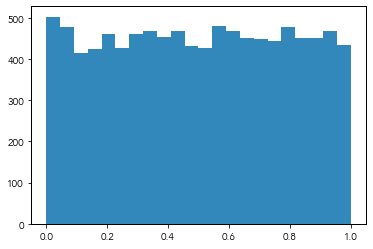

In [9]:
fig,ax = plt.subplots()
ax.hist(y,bins='auto')

[None]

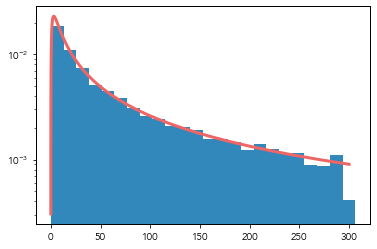

In [19]:
fig,ax = plt.subplots()
from astropy.stats import histogram
N,bin_edges = histogram(r_test,bins='scott')
ax.hist(r_test,bins=bin_edges,density=True)
ax.plot(r,NFW.pdf(r))
ax.set(
    # xscale='log',
    yscale='log',
)

In [16]:
print(y[0:10])

[0.87938484 0.842457   0.60866423 0.14439026 0.51920471 0.00942256
 0.20400945 0.30194392 0.83270021 0.02346536]


In [17]:
print(NFW.cdf(r_test)[0:10])

[0.87937631 0.84246154 0.60865668 0.14438212 0.51920367 0.00942647
 0.20400833 0.30194576 0.8327089  0.02347485]


In [18]:
r_test.min()

DeviceArray(0.07324219, dtype=float64)